# House Price Prediction 

In this notebook, we will work on a simple project called house price prediction. This tutorial will walk you through all the main steps from `retrieving the data`, `getting some insights` (or `EDA`) to building some models (or `modeling`). Hope that it will intest you ;) 

In [1]:
# !pip install pandas
# !pip install openpyxl
# !pip install matplotlib seaborn
# !pip install scikit-learn
# !pip install lightgbm

## 1. Retrieving the data

In any ML problem, the first step is gathering all the related datasets. This data can come from a file, a database, an object storage or from a streaming storage such as Kafka, etc. To be simple, you will get it from a file in this notebook. This file was downloaded via this [link](https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit?usp=sharing&ouid=115253717745408081083&rtpof=true&sd=true).

In [2]:
# First, let's import a library called Pandas for data analysis
import pandas as pd  # We use `as` here since we don't want to type a too long word `pandas`

# Declare the data path
datapath = "../data/HousePricePrediction.xlsx"

# Use pandas to load the data from the datapath
df = pd.read_excel(datapath)  # df is the abbreviation form of DataFrame

# Let's see how a dataframe looks like, it's just another way to see the data
# instead of open an Excel file and see it. However, it is also equipped with
# some functions to do analysis fast
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


This data contains 2919 records and 13 columns. Now, we need to contact a domain expert to get some information about the meaning of each column. This is not a simple step since they are often busy and not available for us to ask. But assume that they have some time, and give us the following information.

- **Id:** House ID
- **MSSubClass:** Identifies the type of dwelling ( such as a house, apartment, mobile home, houseboat, etc.) involved in the sale.
- **MSZoning:** Identifies the general zoning classification of the sale.
- **LotArea:** Lot size in square feet.
- **LotConfig:** Configuration of the lot
- **BldgType:** Type of dwelling
- **verallCond:** Rates the overall condition of the house
- **YearBuilt:** Original construction year
- **YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions).
- **Exterior1st:** Exterior covering on house
- **BsmtFinSF2:** Type 2 finished square feet.
- **TotalBsmtSF:** Total square feet of basement area
- **SalePrice:** To be predicted

Pretty clear! It's time to get some statistics, this is an important step in the `EDA` stage

## 2. EDA

In [3]:
# Now, get the real power of DataFrame. To get some basic stats (mean, min, max and percentile), all we need to do is using `.describe()`
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


Some one may ask what percentile means, let's look at the following image (which was taken from [this](https://data36.com/statistical-variability-standard-deviation-percentiles-histogram/)). The 25th percentile is the value below which 25% of your data points are found. For example, for the `LotArea` column, 25% of our houses have `LotArea` less than 7478 sq ft.

![What is percentile](imgs/percentile.png)

In [4]:
# something is not correct here, since we can't calculate percentiles for columns containing other types than numeric, let's find these columns
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

Indeed, we find some columns like `MSZoning`, and `LotConfig` having `object` type other than `int64` and `float64`. Filter all of them.

In [5]:
# Filter non-numeric columns
df.select_dtypes(
    exclude=["int64", "float64"]
)  # Or you could use df.select_dtypes(include=["object"]) instead.

,MSZoning,LotConfig,BldgType,Exterior1st
0,RL,Inside,1Fam,VinylSd
1,RL,FR2,1Fam,MetalSd
2,RL,Inside,1Fam,VinylSd
3,RL,Corner,1Fam,Wd Sdng
4,RL,FR2,1Fam,VinylSd
...,...,...,...,...
2914,RM,Inside,Twnhs,CemntBd
2915,RM,Inside,TwnhsE,CemntBd
2916,RL,Inside,1Fam,VinylSd
2917,RL,Inside,1Fam,HdBoard


In [6]:
non_numeric_df = df.select_dtypes(exclude=["int64", "float64"])

# Let's see value frequencies at record level
print("Value frequencies at record level")
print(non_numeric_df.value_counts())

print("*" * 60)

# And at column level
print("Value frequencies at column level")
for col in non_numeric_df.columns:
    print(f"Column {col}")
    print(non_numeric_df.groupby(col).size().sort_values(ascending=False))
    print("*" * 30)

Value frequencies at record level
MSZoning  LotConfig  BldgType  Exterior1st
RL        Inside     1Fam      VinylSd        557
                               HdBoard        246
                               Wd Sdng        205
                               MetalSd        170
          Corner     1Fam      VinylSd        132
                                             ... 
RM        Inside     1Fam      CemntBd          1
          FR3        1Fam      Wd Sdng          1
                               MetalSd          1
          Inside     Duplex    HdBoard          1
                     2fmCon    AsphShn          1
Name: count, Length: 191, dtype: int64
************************************************************
Value frequencies at column level
Column MSZoning
MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
dtype: int64
******************************
Column LotConfig
LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85

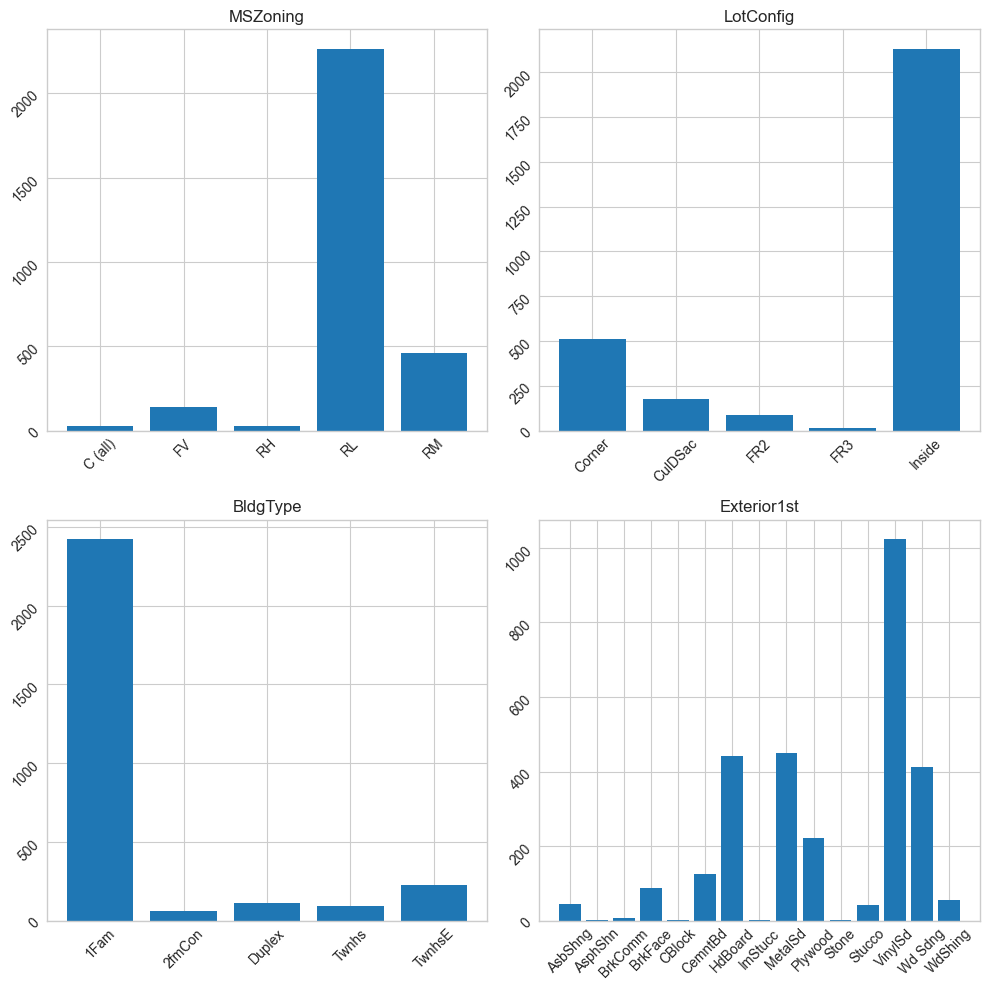

In [7]:
# "I hate numbers, convert it to graphs", a biz person said.
# I'll do some visualizations

# First import the following two libs which are often used for visualizations
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

# Our figure will have 2 rows and 2 cols
num_fig_rows, num_fig_cols = 2, 2
# Read more about subplots here:
# https://python-course.eu/numerical-programming/creating-subplots-in-matplotlib.php
fig, ax = plt.subplots(num_fig_rows, num_fig_cols, figsize=(10, 10))

for row in range(num_fig_rows):
    for col in range(num_fig_cols):
        non_numeric_col = non_numeric_df.columns[row * num_fig_cols + col]
        val_freq = non_numeric_df.groupby(non_numeric_col).size().to_dict()
        ax[row, col].bar(list(val_freq.keys()), list(val_freq.values()))
        ax[row, col].tick_params(labelrotation=45)
        ax[row, col].set_title(non_numeric_col)

fig.tight_layout()
plt.show()

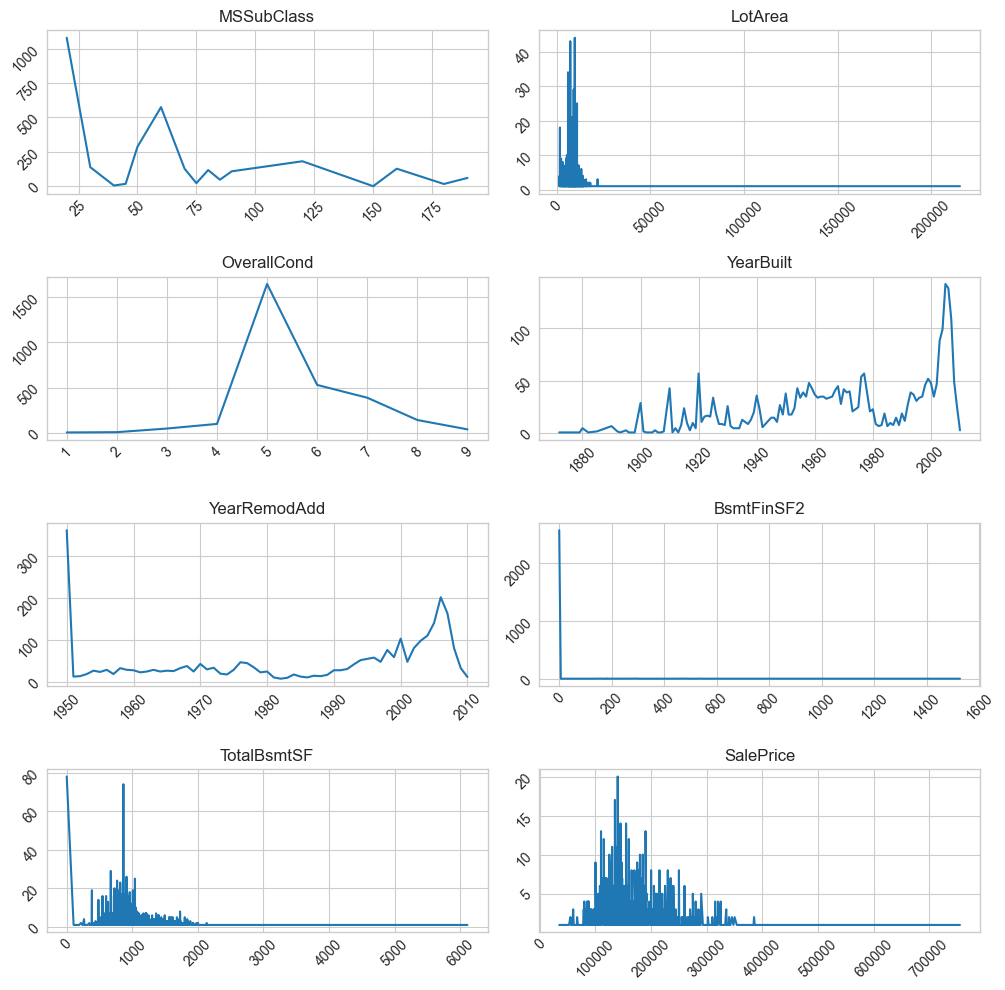

In [8]:
# That's seems to be okay for me, help me to add some figures for numeric columns also
numeric_df = df.select_dtypes(exclude=["object"]).drop(columns=["Id"])

# Our figure now needs 4 rows and 2 cols
num_fig_rows, num_fig_cols = 4, 2
# Read more about subplots here:
# https://python-course.eu/numerical-programming/creating-subplots-in-matplotlib.php
fig, ax = plt.subplots(num_fig_rows, num_fig_cols, figsize=(10, 10))

for row in range(num_fig_rows):
    for col in range(num_fig_cols):
        numeric_col = numeric_df.columns[row * num_fig_cols + col]
        ax[row, col].plot(numeric_df.groupby(numeric_col).size())
        ax[row, col].tick_params(labelrotation=45)
        ax[row, col].set_title(numeric_col)

fig.tight_layout()
plt.show()

There some interesting facts we can conclude here:
- `OverallCond` values as mostly from 5, which means the houses's conditionmay be not too bad
- `LotArea` is highly right-skewed
- Something happened in 1950 results to the reconstruction of many houses in the field `YearRemodAdd`

Now we need to know the correlation of features with the target `SalePrice`

<Axes: >

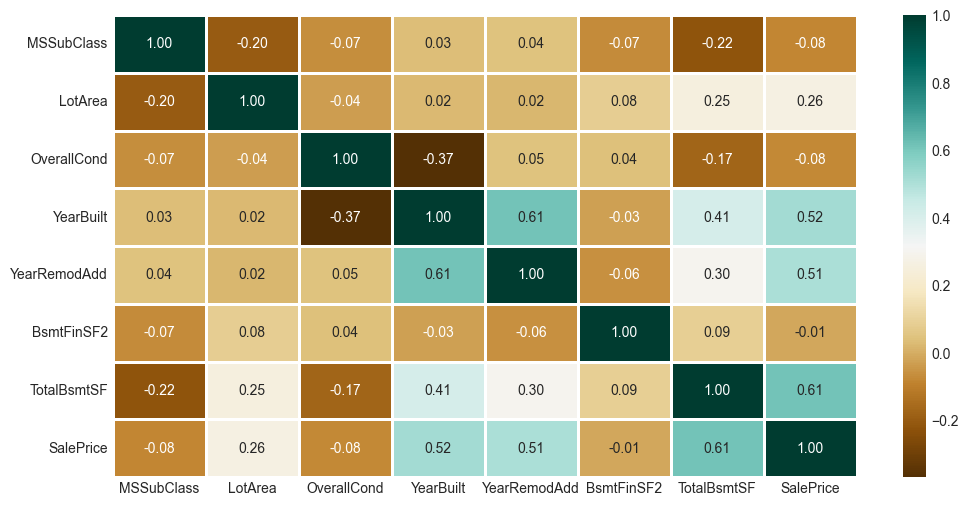

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 6))
# Default corr() using Pearson for calculating linear correlation matrix
sns.heatmap(numeric_df.corr(), cmap="BrBG", fmt=".2f", linewidths=2, annot=True)

We can clearly see `SalePrice` has a fairly strong positive correlation with `TotalBsmtSF`, `YearBuilt` and `YearRemodAdd`, which make so much sense since new and large houses are usually more expensive.

## 3. Modeling

OK, let's EDA be for now, move to the modeling setion to see if we can predict house prices correctly using our current knowledge.

There are 4 main steps in modeling: `preprocessing data`. `train-val-test split`, `training models` and `evaluation`. We will walk through them step by step.

### 3.1. Preprocess Data

There are a lot of `HOW` to consider in this stage, let's review popular ones: 
- **Fill (impute) missing values:** Missing values are often replaced by mean or median or by the most frequent value in the column. Another much simpler way is to drop rows containing missing values, but it can result in a dramatic decrease in the number of records. In some cases, model-based approach may work, for example, using KNN to find similar observations, and use their values instead. Refer to [this tutorial](https://bradleyboehmke.github.io/HOML/engineering.html) for more details.
- **Encode categorical variables:** Categorical (non-numerical) variables are hardly fed to models directly. People often transform them into numerical values by the following techniques: 
    - **One-hot encoding:** e.g., you have one column `alphabet` having 3 values `a`, `b`, and `c`. This technique will create 3 more columns `alphabet_a`, `alphabet_b`, and `alphabet_c`. Now, if a row containing the value `a` in the column `alphabet`, the values of the 3 columns `alphabet_a`, `alphabet_b`, `alphabet_c` for this will be `1`, `0`, `0`. Using this technique can lead to an enormous number of columns with a lot of columns containing zero values (`sparse data problem`), be careful!
    - **Ordinal encoding:** this is often applied to columns containing values like one, two and three, which imply an `order` in their names. In the case of `one`, `two`, and `three`, they can be translated to `(0, 1, 2)`, or `(1, 2, 3)`.
    - **Replace by frequency of observations:** e.g., the value `dog` appears 100 times in the column `animals`. We can replace this value by `100`. 
    - **Feature Hashing:** Convert into a numerical value by using a hash function. This will return an arbitrary number for each category, which is useful when values do not have ordinal property. This technique is also used for columns containing sensitive information, for example identity number.
    - **Weight of Evidence (WoE):** The formula for this is `ln(percentage of good customers who pay back loan/percentage of bad customers who fall behind with paying a loan)`. This technique is mostly used in financial applications such as credit scoring and churn analysis. Please read more about this [here](https://towardsdatascience.com/churn-analysis-information-value-and-weight-of-evidence-6a35db8b9ec5).
- **Transform numerical variables:**  
    - **Log algorithm:** often used for right-skewed data, please refer to [here](https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution) and [here](https://www.kaggle.com/code/aimack/how-to-handle-skewed-distribution).
    - **Reciprocal/inverse algorithm (1/x):** can also be used for right-skewed data, since large values will be compressed as mentioned [here](https://www.linkedin.com/pulse/feature-transformation-techniques-zuhaib-ashraf/).
    - **Square transform (x^2):** to model nonlinear relationships, however, it can have a negative impact on outliers, please take a look at [here](https://www.linkedin.com/pulse/feature-transformation-techniques-zuhaib-ashraf/) for more details. [Don't use it for right skewed data](https://www.kaggle.com/code/aimack/how-to-handle-skewed-distribution).
    - **Box Cox transform:** one type of power transform `(x^n)`. This technique is also used to de-skew data (both left and right-skewed), but more flexible, since it helps to determine an appropriate transformation to be as close as possible to a normal distribution, please read more [here](https://bradleyboehmke.github.io/HOML/engineering.html). However, this tranformation requires values to be strictly positive, so if you have zero or negative values, try `Yeo-Johnson` instead.
    - **Discretization/Binning:** this technique is often used when you have noise in the dataset, so binning can reduce it.
- **Dealing with outliers:** 
    - **Truncating:** Remove all outliers from the dataset. It can cause a significant decrease in the number of samples. 
    - **Winsorization:** For example set all the data below 10th percentile to the value at 10th percentile. 
    - **Zero coding:** Replace values under a threshold with 0, which is often used with non-negative features such as age. 
    - **Capping:** This can be called top/bottom coding, which means values under or above a threshold with be replace by the `mean` value minus/plus `n` times `standard deviation`
- **Derive features from date/datetime columns:** 
    - Extract `year`, `quarter`, `month`, `day`, `day of week` (from 0 to 6) and `hour` 
    - `is_weekend`, `is_leap_year`, `is_morning` 
    - **Cyclic feature encoding:** Using sine and cosine transformation to transform data. It is useful in the case we want to express the differences between (1h and 2h) and (23h and 0h) are same. Please read more [here](https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning).
- **Feature scaling:**
    - **Standardization:** `x_scaled = (x - mean)/std`
    - **Mean normalization:** `x_scaled = (x - mean)/(max - min)`
    - **Min max scaling:** `x_scaled = (x - min)/(max - min)` 
    - **Max absolute scaling:** `x_scaled = x/max` 
    - **Vector unit length scaling:** `x_scaled = x/norm1` or `x/norm2`, in which `norm1 = |x1| + |x2| + ...` and `norm2 = sqrt(x1**2 + x2**2 + ...)`
- **Invent new features:**
    - **Combine multiple features into one** 
    - **Use decision tree's prediction as one feature:** This is the winning solution of the KDD competition in 2009, the author trained a decision tree on some features and turned its prediction to one feature.
- **Dimension reduction:** 
    - **PCA:** Create new features by finding a new cooridinate system to maximize data variance. 
    - **LDA:** Similar to PCA, but maximize the seperability between groups instead of maximize data variance

In [10]:
# Let's check if we have columns containing null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


We can easily see our features are mostly non-null, except some columns such as `MSZoning` having just a few null values, so dropping missing values is not a bad idea. However, a more terrible point we need to pay attention is `SalePrice`, in which about half of them are null. Let's investigate it further.

In [11]:
df[df["SalePrice"].isnull()]

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1460,1460,20,RH,11622,Inside,1Fam,6,1961,1961,VinylSd,144.0,882.0,NaN
1461,1461,20,RL,14267,Corner,1Fam,6,1958,1958,Wd Sdng,0.0,1329.0,NaN
1462,1462,60,RL,13830,Inside,1Fam,5,1997,1998,VinylSd,0.0,928.0,NaN
1463,1463,60,RL,9978,Inside,1Fam,6,1998,1998,VinylSd,0.0,926.0,NaN
1464,1464,120,RL,5005,Inside,TwnhsE,5,1992,1992,HdBoard,0.0,1280.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


Yes, 1459 rows are NaN in `SalePrice` indeed, we can use the above imputing missing values technique, but with your own risks, since `SalePrice` is the target (dependent variable), not features. Another promising solution is clustering our records, then fill the missing `SalePrice` values with the cluster's center the data point belongs to. To keep it simple, I will try with another simple solution, which is dropping NaN rows.

In [12]:
cleaned_df = df[~df["SalePrice"].isnull()]

### 3.2. Train-Val-Test Split

In this section, we will split our cleaned data into 3 main parts: training, validation and testing, in which: 
- **Training:** used for training models 
- **Validation:** used for validating the trained model and tuning hyperparameters if needed. E.g., you have a linear regression model `y = ax1 + bx2 + c`, you use validation dataset to evaluate the trained model and find it is not good, then you can change the hyperparameter so that your new model can become something like `y = ax1 + b` 
- **Testing:** used for testing your trained model before deploying your models into a production environment. This dataset shouldn't be used for tuning hyperparameters as the one above.

Normally, people will devide the above 3 datasets with the ratio 80%, 10% and 10% respectively. Let's do it now!

In [13]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Let's separate X (independent features) and y (dependent features)
# from the cleaned dataframe first
X = cleaned_df.drop(columns=["SalePrice"])
y = cleaned_df["SalePrice"]


# Do train-val-test-split
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=42
)

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 21
[LightGBM] [Info] Start training from score 181441.541952
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.83       0.84  38357.93   
ExtraTreesRegressor                          0.80       0.82  41185.90   
RandomForestRegressor                        0.78       0.80  43458.89   
HistGradientBoostingRegressor                0.75       0.77  46281.42   
LGBMRegressor                                0.75       0.77  46816.68   
BaggingRegressor                             0.74       0.76  47418.50  

### 3.3. Training Models

Our life is now easier, it's time to play around with some models. But first, let's think about what models we are going to use. For a regression problem, we are required to predict continuous values, instead of discrete values in classification. In reality, we often use XGBoost or LightGBM for such regression problems. However, before that, we also need a benchmark, which should be a much simpler model. Take linear regression for this. Let's start!

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_features = numeric_df.drop(columns=["SalePrice"]).columns
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_features = non_numeric_df.columns
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [15]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

clf.fit(X_train, y_train)
print("*" * 50)
print("Model score on training set: %.3f" % clf.score(X_train, y_train))
print("model score on validation set: %.3f" % clf.score(X_val, y_val))

**************************************************
Model score on training set: 0.614
model score on validation set: 0.678


In [16]:
# Now, let's try with LightGBM
import lightgbm as lgb

hyper_params = {
    "task": "train",
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbose": 1,
    "max_depth": 4,
    "num_leaves": 16,
}

clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("lightgbm", lgb.LGBMRegressor(**hyper_params)),
    ]
)

clf.fit(X_train, y_train)

print("*" * 50)
print("Model score on training set: %.3f" % clf.score(X_train, y_train))
print("model score on validation set: %.3f" % clf.score(X_val, y_val))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 27
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

Pretty cool! But tuning hyperparameters for LightGBM manually is terrible, try using an automatic tuning method such as GridSearch or Optuna. ;)

### 3.4. Evaluation

In [17]:
# Now, evaluate on our test set before releasing
clf.score(X_test, y_test)

# Get a prediction
print(f"House Attributes: {X_test.iloc[:1].to_dict()}")
print(f"Predicted: {clf.predict(pd.DataFrame(X_test.iloc[:1]))[0]}")
print(f"Groundtruth: {y_test.iloc[0]}")

House Attributes: {'Id': {416: 416}, 'MSSubClass': {416: 60}, 'MSZoning': {416: 'RL'}, 'LotArea': {416: 7844}, 'LotConfig': {416: 'Inside'}, 'BldgType': {416: '1Fam'}, 'OverallCond': {416: 7}, 'YearBuilt': {416: 1978}, 'YearRemodAdd': {416: 1978}, 'Exterior1st': {416: 'HdBoard'}, 'BsmtFinSF2': {416: 0.0}, 'TotalBsmtSF': {416: 672.0}}
Predicted: 157551.3761237591
Groundtruth: 149500.0


In [18]:
X_test.iloc[0].to_numpy()

array([np.int64(416), np.int64(60), 'RL', np.int64(7844), 'Inside',
       '1Fam', np.int64(7), np.int64(1978), np.int64(1978), 'HdBoard',
       np.float64(0.0), np.float64(672.0)], dtype=object)

### 4. Conclusion

Phhh... We have gone through a lot of steps in this notebook, but it's just a small part of a Data Science/ML project. We will need something automatically such as data processing pipelines instead of manually conducting EDA and processing each column. An automatic and scalable tuning and training pipeline will also be needed to reduce an extensive time locally. But for now, let it be. We will revise all these steps and move each of them into production in module 3 of this course :). Cheers!

### 5. Future Work

I have proposed a lot of ideas in this notebook, it's time for you to beat my score ;).